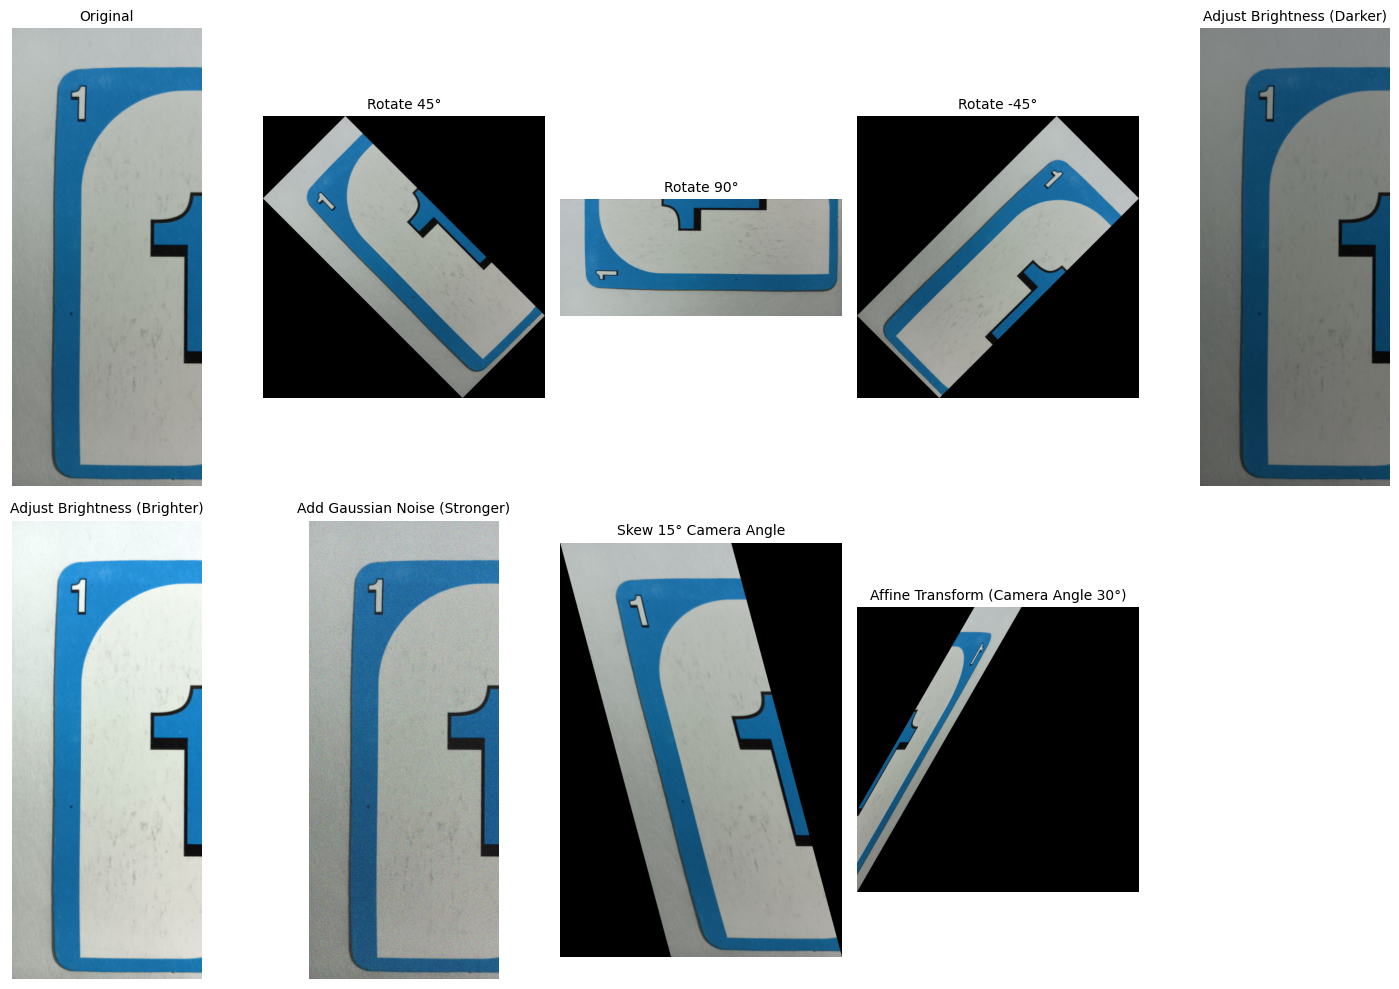

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def augment_image(image_path):
    """
    Apply fixed data augmentations to an image and display the results.
    
    :param image_path: Path to the input image.
    """
    # Load the image in RGB format
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    
    # Define fixed augmentations with their names
    augmentations = [
        ("Original", lambda img: img),
        ("Rotate 45°", lambda img: rotate_image(img, angle=45)),
        ("Rotate 90°", lambda img: rotate_image(img, angle=90)),
        ("Rotate -45°", lambda img: rotate_image(img, angle=-45)),
        ("Adjust Brightness (Darker)", lambda img: adjust_brightness(img, factor=0.7)),
        ("Adjust Brightness (Brighter)", lambda img: adjust_brightness(img, factor=1.3)),
        ("Add Gaussian Noise (Stronger)", lambda img: add_noise(img, std_dev=50)),
        ("Skew 15° Camera Angle", lambda img: skew_camera_angle(img, angle=15)),
        ("Affine Transform (Camera Angle 30°)", lambda img: affine_transform_camera(img, angle=30)),
    ]

    # Apply augmentations
    augmented_images = [(name, func(image)) for name, func in augmentations]

    # Display original and augmented images with labels
    display_images(augmented_images)

def rotate_image(image, angle):
    """
    Rotate the image by a given angle without cropping it.
    """
    h, w = image.shape[:2]
    # Calculate the new bounding dimensions of the image
    new_h = int(w * abs(np.sin(np.radians(angle))) + h * abs(np.cos(np.radians(angle))))
    new_w = int(h * abs(np.sin(np.radians(angle))) + w * abs(np.cos(np.radians(angle))))
    
    # Create the rotation matrix
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    
    # Adjust the rotation matrix to account for translation
    M[0, 2] += (new_w - w) / 2
    M[1, 2] += (new_h - h) / 2
    
    # Perform the rotation with the new canvas size
    rotated_image = cv2.warpAffine(image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))
    return rotated_image

def adjust_brightness(image, factor):
    """
    Adjust the brightness of the image.
    """
    image = image.astype(np.float32) * factor
    image = np.clip(image, 0, 255).astype(np.uint8)
    return image

def add_noise(image, std_dev=50):
    """
    Add Gaussian noise to the image with increased noise factor.
    """
    noise = np.random.normal(0, std_dev, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def skew_camera_angle(image, angle):
    """
    Apply a shear transformation to simulate a camera angle change (skew).
    We adjust the canvas to keep the full image visible.
    """
    h, w = image.shape[:2]
    M = np.float32([[1, np.tan(np.radians(angle)), 0], [0, 1, 0]])
    
    # Calculate new dimensions to avoid cropping the image
    new_w = int(w + abs(np.tan(np.radians(angle))) * h)
    new_h = h
    
    # Apply the shear transformation with new canvas size
    return cv2.warpAffine(image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

def affine_transform_camera(image, angle):
    """
    Apply an affine transform to simulate a camera angle change by applying rotation and shifting.
    We adjust the canvas to keep the full image visible.
    """
    h, w = image.shape[:2]
    
    # Define the points for affine transform
    # These points are chosen to simulate a tilt of the camera along the x-axis by 'angle'
    src_pts = np.float32([[0, 0], [w - 1, 0], [0, h - 1]])
    dst_pts = np.float32([[np.tan(np.radians(angle)) * h, 0], [w - 1, 0], [0, h - 1]])
    
    # Calculate the affine matrix
    M = cv2.getAffineTransform(src_pts, dst_pts)
    
    # Calculate new width and height to avoid cropping the image
    new_w = w + abs(int(np.tan(np.radians(angle)) * h))
    new_h = h
    
    # Apply the affine transformation with the new canvas size
    return cv2.warpAffine(image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

def display_images(images):
    """
    Display a list of images with titles using matplotlib.
    """
    num_images = len(images)
    plt.figure(figsize=(15, 10))
    for i, (title, img) in enumerate(images):
        plt.subplot(2, (num_images + 1) // 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title, fontsize=10)
    plt.tight_layout()
    plt.show()

# Example Usage
image_path = "./dataset/blue/1.jpg"  # Replace with your image path
augment_image(image_path)


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def augment_image(image_path, save_dir, file_name):
    """
    Apply fixed data augmentations to an image and save the results.

    :param image_path: Path to the input image.
    :param save_dir: Directory to save the augmented images.
    :param file_name: Name to use for saving images (without extension).
    """
    # Load the image in RGB format
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    
    # Define fixed augmentations with their names
    augmentations = [
        ("Original", lambda img: img),
        ("Rotate 45°", lambda img: rotate_image(img, angle=45)),
        ("Rotate 90°", lambda img: rotate_image(img, angle=90)),
        ("Rotate -45°", lambda img: rotate_image(img, angle=-45)),
        ("Adjust Brightness (Darker)", lambda img: adjust_brightness(img, factor=0.7)),
        ("Adjust Brightness (Brighter)", lambda img: adjust_brightness(img, factor=1.3)),
        ("Add Gaussian Noise (Stronger)", lambda img: add_noise(img, std_dev=50)),
        ("Skew 15° Camera Angle", lambda img: skew_camera_angle(img, angle=15)),
        ("Affine Transform (Camera Angle 30°)", lambda img: affine_transform_camera(img, angle=30)),
    ]

    # Apply augmentations and save the results
    for name, func in augmentations:
        augmented_img = func(image)
        save_path = os.path.join(save_dir, f"{file_name}_{name.replace(' ', '_')}.jpg")
        cv2.imwrite(save_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))
        print(f"Saved: {save_path}")

def rotate_image(image, angle):
    """ Rotate the image by a given angle without cropping it. """
    h, w = image.shape[:2]
    new_h = int(w * abs(np.sin(np.radians(angle))) + h * abs(np.cos(np.radians(angle))))
    new_w = int(h * abs(np.sin(np.radians(angle))) + w * abs(np.cos(np.radians(angle))))
    
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    
    M[0, 2] += (new_w - w) / 2
    M[1, 2] += (new_h - h) / 2
    
    return cv2.warpAffine(image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

def adjust_brightness(image, factor):
    """ Adjust the brightness of the image. """
    image = image.astype(np.float32) * factor
    image = np.clip(image, 0, 255).astype(np.uint8)
    return image

def add_noise(image, std_dev=50):
    """ Add Gaussian noise to the image with increased noise factor. """
    noise = np.random.normal(0, std_dev, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def skew_camera_angle(image, angle):
    """ Apply a shear transformation to simulate a camera angle change (skew). """
    h, w = image.shape[:2]
    M = np.float32([[1, np.tan(np.radians(angle)), 0], [0, 1, 0]])
    new_w = int(w + abs(np.tan(np.radians(angle))) * h)
    new_h = h
    return cv2.warpAffine(image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

def affine_transform_camera(image, angle):
    """ Apply an affine transform to simulate a camera angle change. """
    h, w = image.shape[:2]
    src_pts = np.float32([[0, 0], [w - 1, 0], [0, h - 1]])
    dst_pts = np.float32([[np.tan(np.radians(angle)) * h, 0], [w - 1, 0], [0, h - 1]])
    M = cv2.getAffineTransform(src_pts, dst_pts)
    new_w = w + abs(int(np.tan(np.radians(angle)) * h))
    new_h = h
    return cv2.warpAffine(image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

def apply_augmentations_to_folder(input_folder, output_folder):
    """ Apply augmentations to all images in a given folder and save them to an output folder. """
    # Create the output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process all image files in the input folder
    for file_name in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file_name)
        if os.path.isfile(file_path):
            print(f"Processing: {file_name}")
            augment_image(file_path, output_folder, file_name.split('.')[0])  # Remove extension for output filenames

# Example usage: Apply augmentations to all images in the 'blue' class folder
apply_augmentations_to_folder("./dataset/blue", "./aug_dataset/blue")
apply_augmentations_to_folder("./dataset/green", "./aug_dataset/green")
apply_augmentations_to_folder("./dataset/yellow", "./aug_dataset/yellow")
apply_augmentations_to_folder("./dataset/pink", "./aug_dataset/pink")
apply_augmentations_to_folder("./dataset/wild", "./aug_dataset/wild")


Processing: 1.jpg
Saved: ./aug_dataset/blue\1_Original.jpg
Saved: ./aug_dataset/blue\1_Rotate_45°.jpg
Saved: ./aug_dataset/blue\1_Rotate_90°.jpg
Saved: ./aug_dataset/blue\1_Rotate_-45°.jpg
Saved: ./aug_dataset/blue\1_Adjust_Brightness_(Darker).jpg
Saved: ./aug_dataset/blue\1_Adjust_Brightness_(Brighter).jpg
Saved: ./aug_dataset/blue\1_Add_Gaussian_Noise_(Stronger).jpg
Saved: ./aug_dataset/blue\1_Skew_15°_Camera_Angle.jpg
Saved: ./aug_dataset/blue\1_Affine_Transform_(Camera_Angle_30°).jpg
Processing: 10.jpg
Saved: ./aug_dataset/blue\10_Original.jpg
Saved: ./aug_dataset/blue\10_Rotate_45°.jpg
Saved: ./aug_dataset/blue\10_Rotate_90°.jpg
Saved: ./aug_dataset/blue\10_Rotate_-45°.jpg
Saved: ./aug_dataset/blue\10_Adjust_Brightness_(Darker).jpg
Saved: ./aug_dataset/blue\10_Adjust_Brightness_(Brighter).jpg
Saved: ./aug_dataset/blue\10_Add_Gaussian_Noise_(Stronger).jpg
Saved: ./aug_dataset/blue\10_Skew_15°_Camera_Angle.jpg
Saved: ./aug_dataset/blue\10_Affine_Transform_(Camera_Angle_30°).jpg
Proc

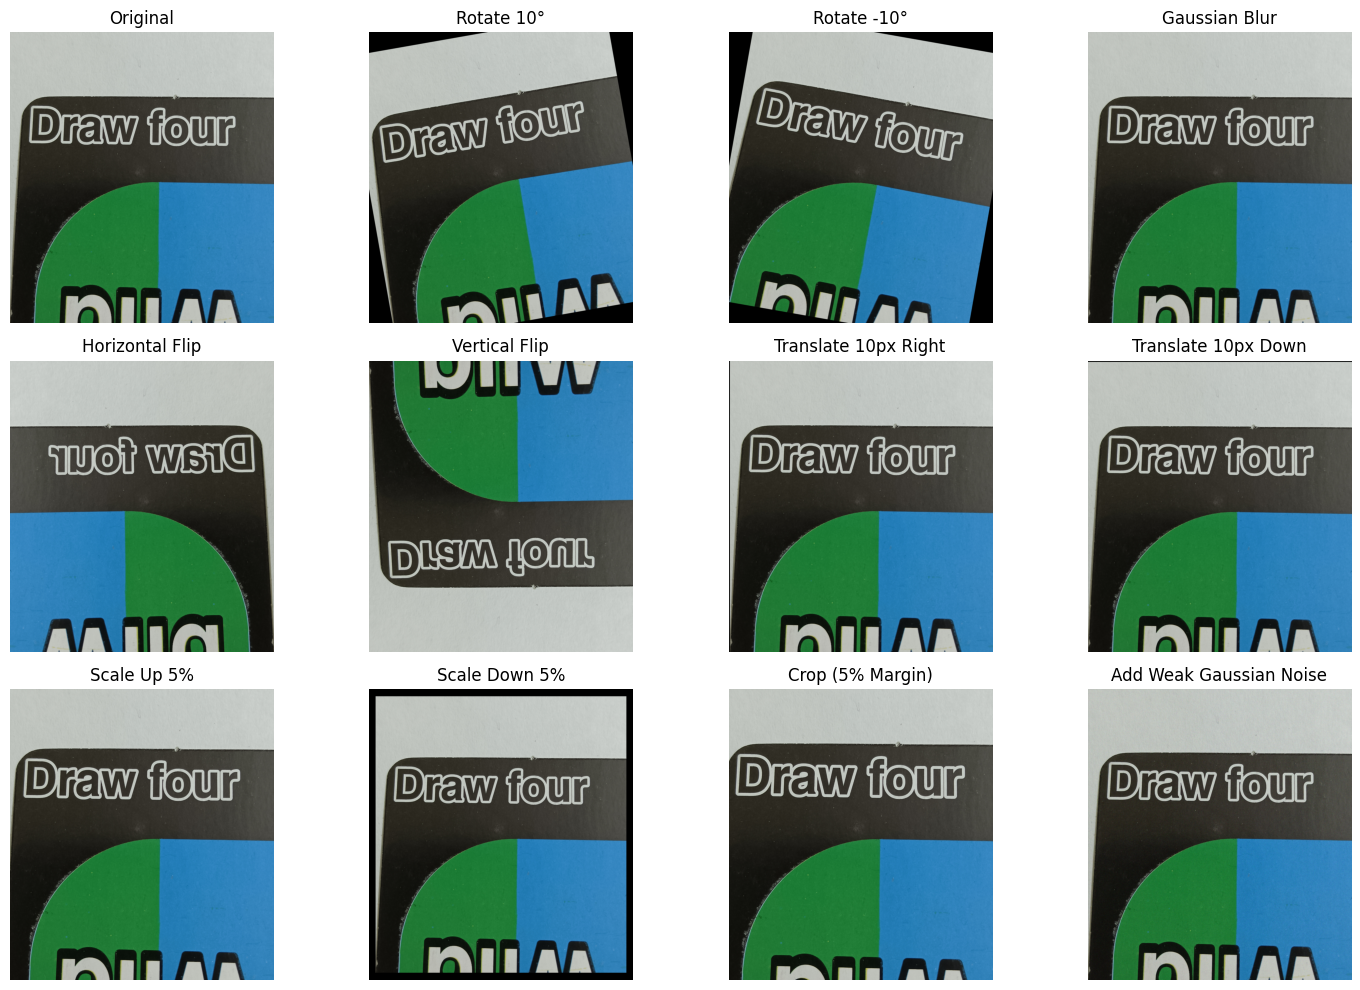

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def test_augment_image(image_path):
    """
    Apply weak data augmentations to a single image and display the results.

    :param image_path: Path to the input image.
    """
    # Load the image in RGB format
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")

    # Define weak augmentations
    augmentations = [
        ("Original", lambda img: img),
        ("Rotate 10°", lambda img: rotate_image(img, angle=10)),
        ("Rotate -10°", lambda img: rotate_image(img, angle=-10)),
        ("Gaussian Blur", lambda img: apply_gaussian_blur(img, kernel_size=3)),
        ("Horizontal Flip", lambda img: horizontal_flip(img)),
        ("Vertical Flip", lambda img: vertical_flip(img)),
        ("Translate 10px Right", lambda img: translate_image(img, x_shift=10, y_shift=0)),
        ("Translate 10px Down", lambda img: translate_image(img, x_shift=0, y_shift=10)),
        ("Scale Up 5%", lambda img: scale_image(img, scale=1.05)),
        ("Scale Down 5%", lambda img: scale_image(img, scale=0.95)),
        ("Crop (5% Margin)", lambda img: crop_image(img, margin=0.05)),
        ("Add Weak Gaussian Noise", lambda img: add_noise(img, std_dev=15)),
    ]

    # Apply augmentations and display results
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    for idx, (name, func) in enumerate(augmentations):
        augmented_img = func(image)
        ax = axes[idx // 4, idx % 4]
        ax.imshow(augmented_img)
        ax.set_title(name)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Augmentation functions
def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))


def apply_gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


def horizontal_flip(image):
    return cv2.flip(image, 1)


def vertical_flip(image):
    return cv2.flip(image, 0)


def translate_image(image, x_shift, y_shift):
    h, w = image.shape[:2]
    M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))


def scale_image(image, scale):
    h, w = image.shape[:2]
    new_w, new_h = int(w * scale), int(h * scale)
    scaled_image = cv2.resize(image, (new_w, new_h))
    if scale > 1.0:
        crop_x = (new_w - w) // 2
        crop_y = (new_h - h) // 2
        return scaled_image[crop_y:crop_y + h, crop_x:crop_x + w]
    else:
        pad_x = (w - new_w) // 2
        pad_y = (h - new_h) // 2
        return cv2.copyMakeBorder(scaled_image, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_CONSTANT, value=(0, 0, 0))


def crop_image(image, margin):
    h, w = image.shape[:2]
    margin_h, margin_w = int(h * margin), int(w * margin)
    return image[margin_h:h - margin_h, margin_w:w - margin_w]


def add_noise(image, std_dev):
    noise = np.random.normal(0, std_dev, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


# Test on a single image
test_image_path = "./dataset/wild/1.jpg"  # Replace with the path to your test image
test_augment_image(test_image_path)


In [3]:
import cv2
import numpy as np
import os
import string
from itertools import product


def apply_augmentations_to_wild(input_folder, output_folder):
    """
    Apply weak augmentations to all images in the wild card folder and save the results with unique filenames.

    :param input_folder: Path to the folder containing wild card images.
    :param output_folder: Path to the folder to save augmented images.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    augmentations = [
        ("Rotate_10", lambda img: rotate_image(img, angle=10)),
        ("Rotate_-10", lambda img: rotate_image(img, angle=-10)),
        ("Gaussian_Blur", lambda img: apply_gaussian_blur(img, kernel_size=3)),
        ("Horizontal_Flip", lambda img: horizontal_flip(img)),
        ("Vertical_Flip", lambda img: vertical_flip(img)),
        ("Translate_10px_Right", lambda img: translate_image(img, x_shift=10, y_shift=0)),
        ("Translate_10px_Down", lambda img: translate_image(img, x_shift=0, y_shift=10)),
        ("Scale_Up_5%", lambda img: scale_image(img, scale=1.05)),
        ("Scale_Down_5%", lambda img: scale_image(img, scale=0.95)),
        ("Crop_5%_Margin", lambda img: crop_image(img, margin=0.05)),
        ("Weak_Noise", lambda img: add_noise(img, std_dev=15)),
    ]

    unique_ids = generate_unique_ids()

    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        if os.path.isfile(input_path):
            image = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)
            if image is None:
                print(f"Skipping {file_name}: Could not load image.")
                continue

            base_name = os.path.splitext(file_name)[0]  # Remove extension
            for aug_name, aug_func in augmentations:
                unique_id = next(unique_ids)  # Get the next unique ID
                augmented_image = aug_func(image)
                output_file = f"extra_aug_{base_name}_{unique_id}.jpg"
                output_path = os.path.join(output_folder, output_file)
                cv2.imwrite(output_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
                print(f"Saved: {output_path}")


def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))


def apply_gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


def horizontal_flip(image):
    return cv2.flip(image, 1)


def vertical_flip(image):
    return cv2.flip(image, 0)


def translate_image(image, x_shift, y_shift):
    h, w = image.shape[:2]
    M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))


def scale_image(image, scale):
    h, w = image.shape[:2]
    new_w, new_h = int(w * scale), int(h * scale)
    scaled_image = cv2.resize(image, (new_w, new_h))
    if scale > 1.0:
        crop_x = (new_w - w) // 2
        crop_y = (new_h - h) // 2
        return scaled_image[crop_y:crop_y + h, crop_x:crop_x + w]
    else:
        pad_x = (w - new_w) // 2
        pad_y = (h - new_h) // 2
        return cv2.copyMakeBorder(scaled_image, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_CONSTANT, value=(0, 0, 0))


def crop_image(image, margin):
    h, w = image.shape[:2]
    margin_h, margin_w = int(h * margin), int(w * margin)
    return image[margin_h:h - margin_h, margin_w:w - margin_w]


def add_noise(image, std_dev):
    noise = np.random.normal(0, std_dev, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


def generate_unique_ids():
    """Generate unique IDs using alphabetical sequences."""
    alphabet = string.ascii_lowercase
    for length in range(1, 4):  # Handles IDs like a, b, ..., z, aa, bb, ..., zzz
        for item in product(alphabet, repeat=length):
            yield ''.join(item)


# Apply augmentations to the wild class dataset
input_folder = "./dataset/wild"
output_folder = "./new_aug/"
apply_augmentations_to_wild(input_folder, output_folder)


Saved: ./new_aug/extra_aug_1_a.jpg
Saved: ./new_aug/extra_aug_1_b.jpg
Saved: ./new_aug/extra_aug_1_c.jpg
Saved: ./new_aug/extra_aug_1_d.jpg
Saved: ./new_aug/extra_aug_1_e.jpg
Saved: ./new_aug/extra_aug_1_f.jpg
Saved: ./new_aug/extra_aug_1_g.jpg
Saved: ./new_aug/extra_aug_1_h.jpg
Saved: ./new_aug/extra_aug_1_i.jpg
Saved: ./new_aug/extra_aug_1_j.jpg
Saved: ./new_aug/extra_aug_1_k.jpg
Saved: ./new_aug/extra_aug_10_l.jpg
Saved: ./new_aug/extra_aug_10_m.jpg
Saved: ./new_aug/extra_aug_10_n.jpg
Saved: ./new_aug/extra_aug_10_o.jpg
Saved: ./new_aug/extra_aug_10_p.jpg
Saved: ./new_aug/extra_aug_10_q.jpg
Saved: ./new_aug/extra_aug_10_r.jpg
Saved: ./new_aug/extra_aug_10_s.jpg
Saved: ./new_aug/extra_aug_10_t.jpg
Saved: ./new_aug/extra_aug_10_u.jpg
Saved: ./new_aug/extra_aug_10_v.jpg
Saved: ./new_aug/extra_aug_11_w.jpg
Saved: ./new_aug/extra_aug_11_x.jpg
Saved: ./new_aug/extra_aug_11_y.jpg
Saved: ./new_aug/extra_aug_11_z.jpg
Saved: ./new_aug/extra_aug_11_aa.jpg
Saved: ./new_aug/extra_aug_11_ab.jpg
S

In [ ]:
# 198 (old) + 242 (new) = 440 